## **RADI608: Data Mining and Machine Learning**

### Assignment: KMeans
**Romen Samuel Rodis Wabina** <br>
Student, PhD Data Science in Healthcare and Clinical Informatics <br>
Clinical Epidemiology and Biostatistics, Faculty of Medicine (Ramathibodi Hospital) <br>
Mahidol University

Note: In case of Python Markdown errors, you may access the assignment through this GitHub [Link](https://github.com/rrwabina/RADI608/tree/main/Submitted)

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn.metrics import pairwise_distances_argmin

def distance_formula(data, centroids):
    distance = []
    for value in data:
        for center in centroids:
            dis = np.sqrt((value[0] - center[0])**2 + (value[1] - center[1])**2)
            distance.append(dis)
    return distance
    

\begin{equation*}
\begin{aligned}    
    \mathbf{D_0} = 
    \begin{bmatrix}
        {d_{11}} & {d_{12}} & {d_{13}} & {d_{14}} & {d_{15}} & {d_{16}}   \\
        {d_{21}} & {d_{22}} & {d_{23}} & {d_{24}} & {d_{25}} & {d_{26}}   \\
    \end{bmatrix}
\end{aligned}
\end{equation*}


\begin{equation*}
\begin{aligned}
    d_{11} &= \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2}  & d_{21} &= \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2} \\
    d_{11} &= \sqrt{(1 - 1)^2 + (1 - 1)^2}          & d_{21} &= \sqrt{(1 - 1)^2 + (1 - 3)^2}\\
    d_{11} &= 0                                     & d_{21} &= 2    
\end{aligned}
\end{equation*}

\begin{equation*}
\begin{aligned}
    d_{12} &= \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2}  & d_{22} &= \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2} \\
    d_{12} &= \sqrt{(2 - 1)^2 + (1 - 1)^2}          & d_{22} &= \sqrt{(2 - 1)^2 + (1 - 3)^2}\\
    d_{12} &= 1                                     & d_{22} &= \sqrt{5}    
\end{aligned}
\end{equation*}

\begin{equation*}
\begin{aligned}
    d_{13} &= \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2}  & d_{23} &= \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2} \\
    d_{13} &= \sqrt{(1 - 1)^2 + (3 - 1)^2}          & d_{23} &= \sqrt{(1 - 1)^2 + (3 - 3)^2}\\
    d_{13} &= 2                                     & d_{23} &= 0
\end{aligned}
\end{equation*}

\begin{equation*}
\begin{aligned}
    d_{14} &= \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2}  & d_{24} &= \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2} \\
    d_{14} &= \sqrt{(5 - 1)^2 + (2 - 1)^2}          & d_{24} &= \sqrt{(5 - 1)^2 + (2 - 3)^2}\\
    d_{14} &= \sqrt{17}                             & d_{24} &= \sqrt{17}   
\end{aligned}
\end{equation*}

\begin{equation*}
\begin{aligned}
    d_{15} &= \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2}  & d_{25} &= \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2} \\
    d_{15} &= \sqrt{(4 - 1)^2 + (3 - 1)^2}          & d_{25} &= \sqrt{(4 - 1)^2 + (3 - 3)^2}\\
    d_{15} &= \sqrt{13}                             & d_{25} &= 3   
\end{aligned}
\end{equation*}

\begin{equation*}
\begin{aligned}
    d_{15} &= \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2}  & d_{25} &= \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2} \\
    d_{15} &= \sqrt{(5 - 1)^2 + (4 - 1)^2}          & d_{25} &= \sqrt{(5 - 1)^2 + (4 - 3)^2}\\
    d_{15} &= 5                                     & d_{25} &= \sqrt{17}   
\end{aligned}
\end{equation*}

\begin{equation*}
\begin{aligned}    
    \mathbf{D_0} = 
    \begin{bmatrix}
        0 & 1        & 2 & \sqrt{17} & \sqrt{13} & 5   \\
        2 & \sqrt{5} & 0 & \sqrt{17} & 3         & \sqrt{17}   \\
    \end{bmatrix}
    \longrightarrow
    \mathbf{G_0} = 
    \begin{bmatrix}
        1 & 1 & 0 & 1 & 0 & 0   \\
        0 & 0 & 1 & 0 & 1 & 1   \\
    \end{bmatrix}    
\end{aligned}
\end{equation*}

\begin{equation*}
\begin{aligned}
    C_{1} &= (\frac{1+2+5}{3}, \frac{1+1+2}{3})  & C_{2} &= (\frac{1+4+5}{3}, \frac{3+3+4}{3}) \\
    C_{1} &= (2.67, 1.33)                        & C_{2} &= (3.33, 3.33)
\end{aligned}
\end{equation*}

\begin{equation*}
\begin{aligned}
    d_{11} &= \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2}  & d_{21} &= \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2} \\
    d_{11} &= \sqrt{(1 - 2.67)^2 + (1 - 1.33)^2}    & d_{21} &= \sqrt{(1 - 3.33)^2 + (1 - 3.33)^2}\\
    d_{11} &= 1.702                                  & d_{21} &= 3.295    
\end{aligned}
\end{equation*}

\begin{equation*}
\begin{aligned}
    d_{12} &= \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2}  & d_{22} &= \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2} \\
    d_{12} &= \sqrt{(2 - 2.67)^2 + (1 - 1.33)^2}    & d_{22} &= \sqrt{(2 - 3.33)^2 + (1 - 3.33)^2}\\
    d_{12} &= 0.747                                 & d_{22} &= 2.683   
\end{aligned}
\end{equation*}

\begin{equation*}
\begin{aligned}
    d_{13} &= \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2}  & d_{23} &= \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2} \\
    d_{13} &= \sqrt{(1 - 2.67)^2 + (3 - 1.33)^2}    & d_{23} &= \sqrt{(1 - 3.33)^2 + (3 - 3.33)^2}\\
    d_{13} &= 2.362                                 & d_{23} &= 2.353
\end{aligned}
\end{equation*}

\begin{equation*}
\begin{aligned}
    d_{14} &= \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2}  & d_{24} &= \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2} \\
    d_{14} &= \sqrt{(5 - 2.67)^2 + (2 - 1.33)^2}    & d_{24} &= \sqrt{(5 - 3.33)^2 + (2 - 3.33)^2}\\
    d_{14} &= 2.424                                 & d_{24} &= 2.135
\end{aligned}
\end{equation*}

\begin{equation*}
\begin{aligned}
    d_{15} &= \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2}  & d_{25} &= \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2} \\
    d_{15} &= \sqrt{(4 - 2.67)^2 + (3 - 1.33)^2}    & d_{25} &= \sqrt{(4 - 3.33)^2 + (3 - 3.33)^2}\\
    d_{15} &= 2.135                                 & d_{25} &= 0.747 
\end{aligned}
\end{equation*}

\begin{equation*}
\begin{aligned}
    d_{15} &= \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2}  & d_{25} &= \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2} \\
    d_{15} &= \sqrt{(5 - 2.67)^2 + (4 - 1.33)^2}    & d_{25} &= \sqrt{(5 - 3.33)^2 + (4 - 3.33)^2}\\
    d_{15} &= 3.544                                 & d_{25} &= 1.799   
\end{aligned}
\end{equation*}

\begin{equation*}
\begin{aligned}    
    \mathbf{D_0} = 
    \begin{bmatrix}
        1.702 & 0.747 & 2.362 & 2.424 & 2.135 & 3.544   \\
        3.295 & 2.683 & 2.353 & 2.135 & 0.747 & 1.799   \\
    \end{bmatrix}
    \longrightarrow
    \mathbf{G_0} = 
    \begin{bmatrix}
        1 & 1 & 0 & 0 & 0 & 0   \\
        0 & 0 & 1 & 1 & 1 & 1   \\
    \end{bmatrix}    
\end{aligned}
\end{equation*}

In [36]:
X = [[1, 1], [2, 1], [1, 3], [5, 2], [4, 3], [5, 4]]
centroid2 = [[2.67, 1.33], [3.33, 3.33]]
np.round(distance_formula(X, centroid2), 3)

array([1.702, 3.295, 0.747, 2.683, 2.362, 2.353, 2.424, 2.135, 2.135,
       0.747, 3.544, 1.799])

New Center: 
 [[2.67 1.33]
 [3.33 3.33]]
New Center: 
 [[1.33 1.67]
 [4.67 3.  ]]
New Center: 
 [[1.33 1.67]
 [4.67 3.  ]]
Done in 2 iterations
Fit and predict time: 0.11229968070983887


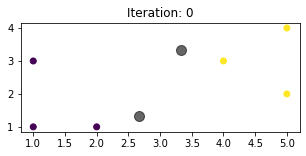

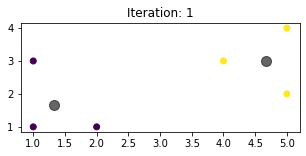

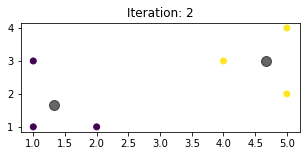

In [31]:


X = [[1, 1], [2, 1], [1, 3], [5, 2], [4, 3], [5, 4]]
centroids = [[1, 1], [1, 3]]
centroid2 = [[2.67, 1.33], [3.33, 3.33]]

def distance_formula(data, centroids):
    distance = []
    for value in data:
        for center in centroids:
            dis = np.sqrt((value[0] - center[0])**2 + (value[1] - center[1])**2)
            distance.append(dis)
    return distance

def kmeans(X, initial_centers, n_clusters = 2):
    m, n = X.shape
    centers = initial_centers
    iteration = 0
    while True:
        labels = pairwise_distances_argmin(X, centers)
        new_centers = []
        for i in range(n_clusters):
            new_centers.append(X[labels == i].mean(axis=0))
        new_centers = np.array(new_centers)
        print(f'New Center: \n {np.round(new_centers, 2)}')

        pred = pairwise_distances_argmin(X, new_centers)
        
        plt.figure(figsize=(5, 2))
        plt.title(f"Iteration: {iteration}")
        plt.scatter(X[:, 0], X[:, 1], c=pred)
        plt.scatter(new_centers[:, 0], new_centers[:, 1], s=100, c = "black", alpha=0.6)

        if(np.allclose(centers, new_centers)):
            break
        else:
            centers = new_centers
            iteration+=1
    print(f"Done in {iteration} iterations")
    return centers
        
def predict(X, centers):
    return pairwise_distances_argmin(X, centers)

X = np.array([[1, 1], [2, 1], [1, 3], [5, 2], [4, 3], [5, 4]])
initial_centers = [[1, 1], [1, 3]]
start = time()
preds = predict(X, kmeans(X, initial_centers))
print(f"Fit and predict time: {time() - start}")